In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

### Loading Training Transactions Data

In [2]:
tr_tr = pd.read_csv('data/train_transaction.csv', index_col='TransactionID')
print('Rows :', tr_tr.shape[0],'  Columns : ',tr_tr.shape[1] )
tr_tr.tail()
print('Memory Usage : ', (tr_tr.memory_usage(deep=True).sum()/1024).round(0))
tr_tr.tail()

Rows : 590540   Columns :  393
Memory Usage :  2162614.0


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tr_tr.isFraud.describe()

count    590540.000000
mean          0.034990
std           0.183755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

0    569877
1     20663
Name: isFraud, dtype: int64

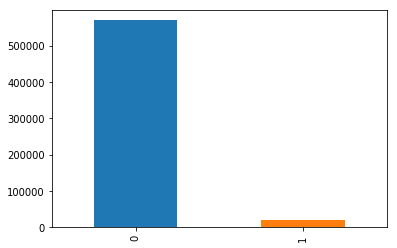

In [4]:
tr_tr.isFraud.value_counts().plot(kind='bar')
tr_tr.isFraud.value_counts()

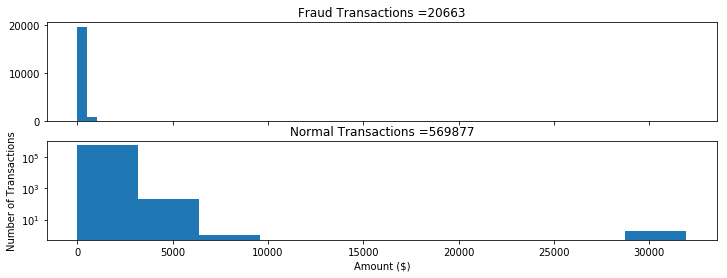

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(tr_tr.TransactionAmt[tr_tr.isFraud == 1], bins = 10)
ax1.set_title('Fraud Transactions ='+str(tr_tr.isFraud.value_counts()[1]))
ax2.hist(tr_tr.TransactionAmt[tr_tr.isFraud == 0], bins = 10)
ax2.set_title('Normal Transactions ='+str(tr_tr.isFraud.value_counts()[0]))
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

### Exploratory Analysis of category Items in Training Transactions data

In [6]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', tr_tr[i].unique())
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('Number of Frauds :','\n', tr_tr[tr_tr.isFraud==1][i].value_counts(dropna=False))
        print('*'*50)

Column Name : ProductCD
Unique Items : ['W' 'H' 'C' 'S' 'R']
Number of NaNs : 0
Number of Frauds : 
 W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64
**************************************************
Column Name : card4
Unique Items : ['discover' 'mastercard' 'visa' 'american express' nan]
Number of NaNs : 1577
Number of Frauds : 
 visa                13373
mastercard           6496
discover              514
american express      239
NaN                    41
Name: card4, dtype: int64
**************************************************
Column Name : card6
Unique Items : ['credit' 'debit' nan 'debit or credit' 'charge card']
Number of NaNs : 1571
Number of Frauds : 
 debit     10674
credit     9950
NaN          39
Name: card6, dtype: int64
**************************************************
Column Name : P_emaildomain
Unique Items : [nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast

### Exploratory Analysis of Float Items in Training Transactions data

In [7]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('*'*50)

Column Name : TransactionAmt
Number of NaNs : 0
**************************************************
Column Name : card2
Number of NaNs : 8933
**************************************************
Column Name : card3
Number of NaNs : 1565
**************************************************
Column Name : card5
Number of NaNs : 4259
**************************************************
Column Name : addr1
Number of NaNs : 65706
**************************************************
Column Name : addr2
Number of NaNs : 65706
**************************************************
Column Name : dist1
Number of NaNs : 352271
**************************************************
Column Name : dist2
Number of NaNs : 552913
**************************************************
Column Name : C1
Number of NaNs : 0
**************************************************
Column Name : C2
Number of NaNs : 0
**************************************************
Column Name : C3
Number of NaNs : 0
**********************************

Number of NaNs : 77096
**************************************************
Column Name : V70
Number of NaNs : 77096
**************************************************
Column Name : V71
Number of NaNs : 77096
**************************************************
Column Name : V72
Number of NaNs : 77096
**************************************************
Column Name : V73
Number of NaNs : 77096
**************************************************
Column Name : V74
Number of NaNs : 77096
**************************************************
Column Name : V75
Number of NaNs : 89164
**************************************************
Column Name : V76
Number of NaNs : 89164
**************************************************
Column Name : V77
Number of NaNs : 89164
**************************************************
Column Name : V78
Number of NaNs : 89164
**************************************************
Column Name : V79
Number of NaNs : 89164
**************************************************
Column

Number of NaNs : 508589
**************************************************
Column Name : V160
Number of NaNs : 508589
**************************************************
Column Name : V161
Number of NaNs : 508595
**************************************************
Column Name : V162
Number of NaNs : 508595
**************************************************
Column Name : V163
Number of NaNs : 508595
**************************************************
Column Name : V164
Number of NaNs : 508589
**************************************************
Column Name : V165
Number of NaNs : 508589
**************************************************
Column Name : V166
Number of NaNs : 508589
**************************************************
Column Name : V167
Number of NaNs : 450909
**************************************************
Column Name : V168
Number of NaNs : 450909
**************************************************
Column Name : V169
Number of NaNs : 450721
************************************

Number of NaNs : 460110
**************************************************
Column Name : V259
Number of NaNs : 449124
**************************************************
Column Name : V260
Number of NaNs : 460110
**************************************************
Column Name : V261
Number of NaNs : 460110
**************************************************
Column Name : V262
Number of NaNs : 460110
**************************************************
Column Name : V263
Number of NaNs : 460110
**************************************************
Column Name : V264
Number of NaNs : 460110
**************************************************
Column Name : V265
Number of NaNs : 460110
**************************************************
Column Name : V266
Number of NaNs : 460110
**************************************************
Column Name : V267
Number of NaNs : 460110
**************************************************
Column Name : V268
Number of NaNs : 460110
************************************

### Exploratory Analysis of Int Items in Training Transactions data

In [8]:
for i in tr_tr.columns:
    if tr_tr[i].dtypes == 'int64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_tr[i].isna().sum())
        print('*'*50)

Column Name : isFraud
Number of NaNs : 0
**************************************************
Column Name : TransactionDT
Number of NaNs : 0
**************************************************
Column Name : card1
Number of NaNs : 0
**************************************************


### Loading Test Transactions Data

In [9]:
te_tr = pd.read_csv('data/test_transaction.csv', index_col='TransactionID')
print(te_tr.shape)
te_tr.tail()

(506691, 392)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170239,34214345,24.346,C,5713,168.0,144.0,visa,147.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Analysis of category Items in Test Transactions data

In [10]:
for i in te_tr.columns:
    if te_tr[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', te_tr[i].unique())
        print('Number of NaNs :', te_tr[i].isna().sum())
        print('*'*50)

Column Name : ProductCD
Unique Items : ['W' 'C' 'S' 'H' 'R']
Number of NaNs : 0
**************************************************
Column Name : card4
Unique Items : ['visa' 'mastercard' 'american express' 'discover' nan]
Number of NaNs : 3086
**************************************************
Column Name : card6
Unique Items : ['debit' 'credit' nan 'charge card']
Number of NaNs : 3007
**************************************************
Column Name : P_emaildomain
Unique Items : ['gmail.com' 'aol.com' 'hotmail.com' nan 'att.net' 'twc.com' 'yahoo.com'
 'verizon.net' 'anonymous.com' 'msn.com' 'q.com' 'outlook.com'
 'icloud.com' 'bellsouth.net' 'sbcglobal.net' 'web.de' 'live.com.mx'
 'ymail.com' 'comcast.net' 'mail.com' 'cox.net' 'me.com' 'aim.com'
 'charter.net' 'rocketmail.com' 'outlook.es' 'centurylink.net' 'live.com'
 'yahoo.de' 'cfl.rr.com' 'mac.com' 'frontier.com' 'netzero.net'
 'frontiernet.net' 'juno.com' 'windstream.net' 'yahoo.fr' 'netzero.com'
 'optonline.net' 'yahoo.co.uk' 'cab

### Exploratory Analysis of Float Items in Test Transactions data

In [11]:
for i in te_tr.columns:
    if te_tr[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', te_tr[i].isna().sum())
        print('*'*50)

Column Name : TransactionAmt
Number of NaNs : 0
**************************************************
Column Name : card2
Number of NaNs : 8654
**************************************************
Column Name : card3
Number of NaNs : 3002
**************************************************
Column Name : card5
Number of NaNs : 4547
**************************************************
Column Name : addr1
Number of NaNs : 65609
**************************************************
Column Name : addr2
Number of NaNs : 65609
**************************************************
Column Name : dist1
Number of NaNs : 291217
**************************************************
Column Name : dist2
Number of NaNs : 470255
**************************************************
Column Name : C1
Number of NaNs : 3
**************************************************
Column Name : C2
Number of NaNs : 3
**************************************************
Column Name : C3
Number of NaNs : 3
**********************************

Number of NaNs : 12899
**************************************************
Column Name : V64
Number of NaNs : 12899
**************************************************
Column Name : V65
Number of NaNs : 12899
**************************************************
Column Name : V66
Number of NaNs : 12899
**************************************************
Column Name : V67
Number of NaNs : 12899
**************************************************
Column Name : V68
Number of NaNs : 12899
**************************************************
Column Name : V69
Number of NaNs : 12899
**************************************************
Column Name : V70
Number of NaNs : 12899
**************************************************
Column Name : V71
Number of NaNs : 12899
**************************************************
Column Name : V72
Number of NaNs : 12899
**************************************************
Column Name : V73
Number of NaNs : 12899
**************************************************
Column

Number of NaNs : 370316
**************************************************
Column Name : V172
Number of NaNs : 369957
**************************************************
Column Name : V173
Number of NaNs : 369957
**************************************************
Column Name : V174
Number of NaNs : 370316
**************************************************
Column Name : V175
Number of NaNs : 370316
**************************************************
Column Name : V176
Number of NaNs : 369957
**************************************************
Column Name : V177
Number of NaNs : 369957
**************************************************
Column Name : V178
Number of NaNs : 369957
**************************************************
Column Name : V179
Number of NaNs : 369957
**************************************************
Column Name : V180
Number of NaNs : 370316
**************************************************
Column Name : V181
Number of NaNs : 369957
************************************

Number of NaNs : 369375
**************************************************
Column Name : V260
Number of NaNs : 379963
**************************************************
Column Name : V261
Number of NaNs : 379963
**************************************************
Column Name : V262
Number of NaNs : 379963
**************************************************
Column Name : V263
Number of NaNs : 379963
**************************************************
Column Name : V264
Number of NaNs : 379963
**************************************************
Column Name : V265
Number of NaNs : 379963
**************************************************
Column Name : V266
Number of NaNs : 379963
**************************************************
Column Name : V267
Number of NaNs : 379963
**************************************************
Column Name : V268
Number of NaNs : 379963
**************************************************
Column Name : V269
Number of NaNs : 379963
************************************

### Check for any missing column in Test transaction data for integrity

In [12]:
for i in tr_tr.columns:
    if i in te_tr.columns:
        pass
    elif i == str('isFraud'):
        print('All columns are present in Test Transactions data')
    else:
        print(i)

All columns are present in Test Transactions data


### Check for any mismatching category items between Training and Test transaction data

In [13]:
for i in te_tr.columns:
    if te_tr[i].dtypes == str('object'):
        for j in te_tr[i].unique():
            if j in tr_tr[i].unique():
                pass
            else:
                print(j,': item is in test but not in training for category : ',i)

nan : item is in test but not in training for category :  card4
nan : item is in test but not in training for category :  card6
nan : item is in test but not in training for category :  P_emaildomain
scranton.edu : item is in test but not in training for category :  P_emaildomain
nan : item is in test but not in training for category :  R_emaildomain
nan : item is in test but not in training for category :  M1
nan : item is in test but not in training for category :  M2
nan : item is in test but not in training for category :  M3
nan : item is in test but not in training for category :  M4
nan : item is in test but not in training for category :  M5
nan : item is in test but not in training for category :  M6
nan : item is in test but not in training for category :  M7
nan : item is in test but not in training for category :  M8
nan : item is in test but not in training for category :  M9


### Loading Training Identity Data

In [14]:
tr_id = pd.read_csv('data/train_identity.csv', index_col='TransactionID')
print(tr_id.shape)
tr_id.tail()

(144233, 40)


,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS
3577534,-45.0,339406.0,NaN,NaN,-10.0,-100.0,NaN,NaN,NaN,NaN,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,RNE-L03 Build/HUAWEIRNE-L03


### Exploratory Analysis of category Items in Training Identity data

In [15]:
for i in tr_id.columns:
    if tr_id[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', tr_id[i].unique())
        print('Number of NaNs :', tr_id[i].isna().sum())
        print('*'*50)

Column Name : id_12
Unique Items : ['NotFound' 'Found']
Number of NaNs : 0
**************************************************
Column Name : id_15
Unique Items : ['New' 'Found' nan 'Unknown']
Number of NaNs : 3248
**************************************************
Column Name : id_16
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 14893
**************************************************
Column Name : id_23
Unique Items : [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
Number of NaNs : 139064
**************************************************
Column Name : id_27
Unique Items : [nan 'Found' 'NotFound']
Number of NaNs : 139064
**************************************************
Column Name : id_28
Unique Items : ['New' 'Found' nan]
Number of NaNs : 3255
**************************************************
Column Name : id_29
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 3255
**************************************************
Column Name : id_30
Unique I

### Exploratory Analysis of Float Items in Training Identity data

In [16]:
for i in tr_id.columns:
    if tr_id[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', tr_id[i].isna().sum())
        print('*'*50)

Column Name : id_01
Number of NaNs : 0
**************************************************
Column Name : id_02
Number of NaNs : 3361
**************************************************
Column Name : id_03
Number of NaNs : 77909
**************************************************
Column Name : id_04
Number of NaNs : 77909
**************************************************
Column Name : id_05
Number of NaNs : 7368
**************************************************
Column Name : id_06
Number of NaNs : 7368
**************************************************
Column Name : id_07
Number of NaNs : 139078
**************************************************
Column Name : id_08
Number of NaNs : 139078
**************************************************
Column Name : id_09
Number of NaNs : 69307
**************************************************
Column Name : id_10
Number of NaNs : 69307
**************************************************
Column Name : id_11
Number of NaNs : 3255
***********************

### Combining training transactions and identity data

In [17]:
tr = tr_tr.join(tr_id)
print(tr.shape)
tr.head()

(590540, 433)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [18]:
print('percent of NaN data :  ',tr.isna().any().mean())

percent of NaN data :   0.9561200923787528


In [19]:
print('Top 10 columns with NaN data :','\n',tr.isna().mean().sort_values(ascending=False).head(10))

Top 10 columns with NaN data : 
 id_24    0.991962
id_25    0.991310
id_07    0.991271
id_08    0.991271
id_21    0.991264
id_26    0.991257
id_22    0.991247
id_23    0.991247
id_27    0.991247
dist2    0.936284
dtype: float64


### Fraud Counts by Category Items for Training Data

In [20]:
for i in tr.columns:
    if tr[i].dtypes == str('object'):
        print('Fraud Counts for : ',i)
        print('-'*30)
        print(tr[tr.isFraud==1][i].value_counts(dropna=False))

Fraud Counts for :  ProductCD
------------------------------
W    8969
C    8008
H    1574
R    1426
S     686
Name: ProductCD, dtype: int64
Fraud Counts for :  card4
------------------------------
visa                13373
mastercard           6496
discover              514
american express      239
NaN                    41
Name: card4, dtype: int64
Fraud Counts for :  card6
------------------------------
debit     10674
credit     9950
NaN          39
Name: card6, dtype: int64
Fraud Counts for :  P_emaildomain
------------------------------
gmail.com          9943
NaN                2790
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net           

NaN          17300
1366x768       493
1920x1080      490
2208x1242      482
1334x750       381
1280x720       181
2436x1125      168
1440x900       128
1600x900       113
1280x800       103
855x480         95
1136x640        68
2048x1536       65
2001x1125       61
1024x600        57
1280x1024       53
2560x1600       43
1024x768        34
2880x1800       29
2220x1080       29
1680x1050       26
801x480         25
1920x1200       22
1364x768        16
3360x2100       16
1365x768        16
1600x1200       14
2560x1440       14
2220x1081       14
1360x768        11
3840x2160        9
2732x2048        9
1024x552         8
640x360          8
2960x1440        7
2224x1668        7
5120x2880        7
1536x864         5
1366x767         5
1920x975         5
2961x1442        5
960x540          4
3201x1800        4
4500x3000        4
1768x992         3
2112x1188        3
3000x2000        3
0x0              3
1916x901         3
2076x1080        2
1920x1281        2
2160x1440        2
1365x767    

### Create categories for items with more than 100 counts of Fraud 

In [21]:
def map_categories(*args):
    columns = [col for col in args]
    for column in columns:
        if column == index:
            return 1
        else:
            return 0


new_tr_categories = []
for i in tr.columns:
    if tr[i].dtypes == str('object'):
        fraud_count = tr[tr_tr.isFraud==1][i].value_counts(dropna=False)
        for index, value in fraud_count.items():
            if value>100:
                tr[(str(i)+'_'+str(index))]=list(map(map_categories, tr[i]))
                new_tr_categories.append((str(i)+'_'+str(index)))
#             else:
#                 tr[(str(i)+'_'+str('other'))]=list(map(map_categories, tr[i]))
#                 new_tr_categories.append((str(i)+'_'+str('other')))
        tr.drop([i], axis=1, inplace=True)
print(new_tr_categories)

['ProductCD_W', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'card4_visa', 'card4_mastercard', 'card4_discover', 'card4_american express', 'card6_debit', 'card6_credit', 'P_emaildomain_gmail.com', 'P_emaildomain_nan', 'P_emaildomain_hotmail.com', 'P_emaildomain_yahoo.com', 'P_emaildomain_anonymous.com', 'P_emaildomain_aol.com', 'P_emaildomain_outlook.com', 'P_emaildomain_comcast.net', 'P_emaildomain_icloud.com', 'P_emaildomain_mail.com', 'R_emaildomain_nan', 'R_emaildomain_gmail.com', 'R_emaildomain_hotmail.com', 'R_emaildomain_yahoo.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_outlook.com', 'R_emaildomain_icloud.com', 'R_emaildomain_aol.com', 'M1_nan', 'M1_T', 'M2_nan', 'M2_T', 'M2_F', 'M3_nan', 'M3_T', 'M3_F', 'M4_M0', 'M4_M2', 'M4_nan', 'M4_M1', 'M5_nan', 'M5_T', 'M5_F', 'M6_nan', 'M6_F', 'M6_T', 'M7_nan', 'M7_F', 'M7_T', 'M8_nan', 'M8_F', 'M8_T', 'M9_nan', 'M9_T', 'M9_F', 'id_12_NotFound', 'id_12_nan', 'id_12_Found', 'id_15_nan', 'id_15_Found', 'id_15_New', 'i

### Replace NaN with zero for combined training data

In [22]:
tr.fillna(0, inplace=True)
tr.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceType_nan,DeviceType_mobile,DeviceType_desktop,DeviceInfo_nan,DeviceInfo_Windows,DeviceInfo_iOS Device,DeviceInfo_MacOS,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_SM-A300H Build/LRX22G,DeviceInfo_rv:57.0
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,13926,0.0,150.0,142.0,315.0,87.0,19.0,...,0,0,0,0,0,0,0,0,0,0
2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,0,0,0,0,0,0,0,0,0,0
2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,0.0,...,0,1,0,0,0,0,0,0,0,0


### Loading Test Transactions Data

In [23]:
te_tr = pd.read_csv('data/test_transaction.csv', index_col='TransactionID')
print(te_tr.shape)
te_tr.tail()

(506691, 392)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4170239,34214345,24.346,C,5713,168.0,144.0,visa,147.0,credit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Loading Test Identity Data

In [24]:
te_id = pd.read_csv('data/test_identity.csv', index_col='TransactionID')
print(te_id.shape)
te_id.tail()

(141907, 40)


,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,NaN,...,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
4170239,-10.0,692090.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG


### Exploratory Analysis of category Items in Test Identity data

In [25]:
for i in te_id.columns:
    if te_id[i].dtypes == str('object'):
        print('Column Name :', i)
        print('Unique Items :', te_id[i].unique())
        print('Number of NaNs :', te_id[i].isna().sum())
        print('*'*50)

Column Name : id_12
Unique Items : ['NotFound' 'Found']
Number of NaNs : 0
**************************************************
Column Name : id_15
Unique Items : ['New' 'Found' 'Unknown' nan]
Number of NaNs : 4930
**************************************************
Column Name : id_16
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 16160
**************************************************
Column Name : id_23
Unique Items : [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
Number of NaNs : 136845
**************************************************
Column Name : id_27
Unique Items : [nan 'Found' 'NotFound']
Number of NaNs : 136845
**************************************************
Column Name : id_28
Unique Items : ['New' 'Found' nan]
Number of NaNs : 5129
**************************************************
Column Name : id_29
Unique Items : ['NotFound' 'Found' nan]
Number of NaNs : 5129
**************************************************
Column Name : id_30
Unique I

Number of NaNs : 71236
**************************************************
Column Name : id_34
Unique Items : [nan 'match_status:2' 'match_status:1']
Number of NaNs : 69732
**************************************************
Column Name : id_35
Unique Items : ['F' 'T' nan]
Number of NaNs : 4930
**************************************************
Column Name : id_36
Unique Items : ['F' 'T' nan]
Number of NaNs : 4930
**************************************************
Column Name : id_37
Unique Items : ['T' 'F' nan]
Number of NaNs : 4930
**************************************************
Column Name : id_38
Unique Items : ['F' 'T' nan]
Number of NaNs : 4930
**************************************************
Column Name : DeviceType
Unique Items : ['mobile' 'desktop' nan]
Number of NaNs : 4976
**************************************************
Column Name : DeviceInfo
Unique Items : ['MYA-L13 Build/HUAWEIMYA-L13' 'LGLS676 Build/MXB48T' 'Trident/7.0' ...
 'LG-V700' 'STV100-1' 'Alcatel_5098O']


### Exploratory Analysis of Float Items in Test Identity data

In [26]:
for i in te_id.columns:
    if te_id[i].dtypes == 'float64':
        print('Column Name :', i)
        print('Number of NaNs :', te_id[i].isna().sum())
        print('*'*50)

Column Name : id_01
Number of NaNs : 0
**************************************************
Column Name : id_02
Number of NaNs : 4931
**************************************************
Column Name : id_03
Number of NaNs : 75426
**************************************************
Column Name : id_04
Number of NaNs : 75426
**************************************************
Column Name : id_05
Number of NaNs : 7157
**************************************************
Column Name : id_06
Number of NaNs : 7157
**************************************************
Column Name : id_07
Number of NaNs : 136848
**************************************************
Column Name : id_08
Number of NaNs : 136848
**************************************************
Column Name : id_09
Number of NaNs : 67569
**************************************************
Column Name : id_10
Number of NaNs : 67569
**************************************************
Column Name : id_11
Number of NaNs : 5129
***********************

In [27]:
### check for any missing column in Test identity data for integrity
for i in tr_id.columns:
    if i in te_id.columns:
        pass
    else:
        print(i)

In [28]:
for i in te_id.columns:
    if te_id[i].dtypes == str('object'):
        for j in te_id[i].unique():
            if j in tr_id[i].unique():
                pass
            else:
                print(j,': item is in test but not in training for category : ',i)

nan : item is in test but not in training for category :  id_15
nan : item is in test but not in training for category :  id_16
nan : item is in test but not in training for category :  id_23
nan : item is in test but not in training for category :  id_27
nan : item is in test but not in training for category :  id_28
nan : item is in test but not in training for category :  id_29
nan : item is in test but not in training for category :  id_30
Android 9 : item is in test but not in training for category :  id_30
iOS 12.0.0 : item is in test but not in training for category :  id_30
Mac OS X 10_13_6 : item is in test but not in training for category :  id_30
Mac OS X 10.14 : item is in test but not in training for category :  id_30
Mac OS X 10_14_0 : item is in test but not in training for category :  id_30
Mac OS X 10_14 : item is in test but not in training for category :  id_30
iOS 12.1.0 : item is in test but not in training for category :  id_30
Mac OS X 10_14_1 : item is in test b

3439x1440 : item is in test but not in training for category :  id_33
2560x1441 : item is in test but not in training for category :  id_33
800x480 : item is in test but not in training for category :  id_33
3200x1799 : item is in test but not in training for category :  id_33
3840x2161 : item is in test but not in training for category :  id_33
1364x767 : item is in test but not in training for category :  id_33
3000x1999 : item is in test but not in training for category :  id_33
2688x1242 : item is in test but not in training for category :  id_33
1080x675 : item is in test but not in training for category :  id_33
2735x1824 : item is in test but not in training for category :  id_33
2303x1295 : item is in test but not in training for category :  id_33
1592x828 : item is in test but not in training for category :  id_33
3122x1442 : item is in test but not in training for category :  id_33
2560x1599 : item is in test but not in training for category :  id_33
3239x2159 : item is in te

1680x1018 : item is in test but not in training for category :  id_33
2162x1081 : item is in test but not in training for category :  id_33
455x256 : item is in test but not in training for category :  id_33
2646x1440 : item is in test but not in training for category :  id_33
2562x1440 : item is in test but not in training for category :  id_33
2789x1442 : item is in test but not in training for category :  id_33
2241x1080 : item is in test but not in training for category :  id_33
3839x1599 : item is in test but not in training for category :  id_33
1280x767 : item is in test but not in training for category :  id_33
2561x1312 : item is in test but not in training for category :  id_33
2162x1082 : item is in test but not in training for category :  id_33
2768x1440 : item is in test but not in training for category :  id_33
3239x2160 : item is in test but not in training for category :  id_33
2341x1080 : item is in test but not in training for category :  id_33
2928x1440 : item is in 

moto g(6) Build/OPS27.82-72 : item is in test but not in training for category :  DeviceInfo
LM-X210CM : item is in test but not in training for category :  DeviceInfo
ASUS_X00AD : item is in test but not in training for category :  DeviceInfo
LM-X410(FG : item is in test but not in training for category :  DeviceInfo
5085A : item is in test but not in training for category :  DeviceInfo
G3123 Build/48.1.A.2.21 : item is in test but not in training for category :  DeviceInfo
D5803 : item is in test but not in training for category :  DeviceInfo
Orange_Rise_33 : item is in test but not in training for category :  DeviceInfo
N9519 : item is in test but not in training for category :  DeviceInfo
H3311 : item is in test but not in training for category :  DeviceInfo
es-es : item is in test but not in training for category :  DeviceInfo
S8 : item is in test but not in training for category :  DeviceInfo
Mi A1 Build/OPM1.171019.026 : item is in test but not in training for category :  Device

RCT6973W43MD : item is in test but not in training for category :  DeviceInfo
LG-V410/V41020e : item is in test but not in training for category :  DeviceInfo
VS988 Build/OPR1.170623.032 : item is in test but not in training for category :  DeviceInfo
LM-X212(G : item is in test but not in training for category :  DeviceInfo
LG-H955 : item is in test but not in training for category :  DeviceInfo
SM-G935F : item is in test but not in training for category :  DeviceInfo
Life : item is in test but not in training for category :  DeviceInfo
moto g(6) Build/OPS27.82-87 : item is in test but not in training for category :  DeviceInfo
SAMSUNG SM-J400M Build/R16NW : item is in test but not in training for category :  DeviceInfo
BLA-A09 Build/HUAWEIBLA-A09 : item is in test but not in training for category :  DeviceInfo
Pixel 2 Build/PPR1.180610.009 : item is in test but not in training for category :  DeviceInfo
U2 : item is in test but not in training for category :  DeviceInfo
N9137 : item 

E5663 : item is in test but not in training for category :  DeviceInfo
SM-G900T : item is in test but not in training for category :  DeviceInfo
Galaxy : item is in test but not in training for category :  DeviceInfo
AGS-W09 : item is in test but not in training for category :  DeviceInfo
CPH1835 Build/O11019 : item is in test but not in training for category :  DeviceInfo
GT-S6810M : item is in test but not in training for category :  DeviceInfo
hi6250 Build/MRA58K : item is in test but not in training for category :  DeviceInfo
LM-X410.F : item is in test but not in training for category :  DeviceInfo
Pixel 2 XL Build/PPR2.181005.003 : item is in test but not in training for category :  DeviceInfo
Redmi 5 Plus Build/OPM1.171019.019 : item is in test but not in training for category :  DeviceInfo
Moto G (5) Plus Build/OPS28.85-13 : item is in test but not in training for category :  DeviceInfo
G3312 : item is in test but not in training for category :  DeviceInfo
moto g(6) plus Build/

LG-H840 : item is in test but not in training for category :  DeviceInfo
CAM-L03 : item is in test but not in training for category :  DeviceInfo
SLA-L03 : item is in test but not in training for category :  DeviceInfo
BLADE V8Q : item is in test but not in training for category :  DeviceInfo
LG-M400 : item is in test but not in training for category :  DeviceInfo
5052Y : item is in test but not in training for category :  DeviceInfo
SM-G570M Build/R16NW : item is in test but not in training for category :  DeviceInfo
SM-A720F : item is in test but not in training for category :  DeviceInfo
QMV7B : item is in test but not in training for category :  DeviceInfo
HUAWEI TAG-L13 : item is in test but not in training for category :  DeviceInfo
SM-G930R4 Build/R16NW : item is in test but not in training for category :  DeviceInfo
5080A : item is in test but not in training for category :  DeviceInfo
SM-T113NU : item is in test but not in training for category :  DeviceInfo
Redmi 6A : item is

Ilium X710 : item is in test but not in training for category :  DeviceInfo
moto x4 : item is in test but not in training for category :  DeviceInfo
Hisense U963 : item is in test but not in training for category :  DeviceInfo
PRA-LX1 : item is in test but not in training for category :  DeviceInfo
NEM-L51 : item is in test but not in training for category :  DeviceInfo
SM-G930W8 : item is in test but not in training for category :  DeviceInfo
GT-I9300I : item is in test but not in training for category :  DeviceInfo
LLD-L31 : item is in test but not in training for category :  DeviceInfo
CMR-W19 : item is in test but not in training for category :  DeviceInfo
H3223 : item is in test but not in training for category :  DeviceInfo
SM-J530F : item is in test but not in training for category :  DeviceInfo
LM-Q610.FG : item is in test but not in training for category :  DeviceInfo
DRA-L21 : item is in test but not in training for category :  DeviceInfo
LG-K220 : item is in test but not in 

M4 SS4458 : item is in test but not in training for category :  DeviceInfo
LG-H870DS : item is in test but not in training for category :  DeviceInfo
D6653 : item is in test but not in training for category :  DeviceInfo
TA-1039 : item is in test but not in training for category :  DeviceInfo
TA-1033 : item is in test but not in training for category :  DeviceInfo
LM-G710VM : item is in test but not in training for category :  DeviceInfo
Y635-L03 : item is in test but not in training for category :  DeviceInfo
Z981 : item is in test but not in training for category :  DeviceInfo
moto e5 play Build/OPG28.54-19 : item is in test but not in training for category :  DeviceInfo
SAMSUNG-SM-J320A : item is in test but not in training for category :  DeviceInfo
CRO-L03 : item is in test but not in training for category :  DeviceInfo
SNE-LX3 : item is in test but not in training for category :  DeviceInfo
SM-G900T Build/LMY47X : item is in test but not in training for category :  DeviceInfo
EVA

8050G : item is in test but not in training for category :  DeviceInfo
Rex Build/MRA58K : item is in test but not in training for category :  DeviceInfo
LG-LS777 : item is in test but not in training for category :  DeviceInfo
SM-G930U : item is in test but not in training for category :  DeviceInfo
Pixel 3 XL : item is in test but not in training for category :  DeviceInfo
P5526A : item is in test but not in training for category :  DeviceInfo
LG-D120 Build/KOT49I.V10a : item is in test but not in training for category :  DeviceInfo
FRD-L09 : item is in test but not in training for category :  DeviceInfo
Hisense L675 : item is in test but not in training for category :  DeviceInfo
SM-T110 : item is in test but not in training for category :  DeviceInfo
KFAPWI : item is in test but not in training for category :  DeviceInfo
GT-I8190L : item is in test but not in training for category :  DeviceInfo
Moto E (4) Plus Build/NMA26.42-167 : item is in test but not in training for category :  

LG-M327 : item is in test but not in training for category :  DeviceInfo
Lifesize : item is in test but not in training for category :  DeviceInfo
PSPC550 : item is in test but not in training for category :  DeviceInfo
8080 : item is in test but not in training for category :  DeviceInfo
ONEPLUS A6013 : item is in test but not in training for category :  DeviceInfo
7048A : item is in test but not in training for category :  DeviceInfo
SM-N950U1 : item is in test but not in training for category :  DeviceInfo
Tab8 : item is in test but not in training for category :  DeviceInfo
SM-N9200 : item is in test but not in training for category :  DeviceInfo
C2105 : item is in test but not in training for category :  DeviceInfo
SM-J320V : item is in test but not in training for category :  DeviceInfo
KFTT : item is in test but not in training for category :  DeviceInfo
SAMSUNG SM-G610M Build/M1AJQ : item is in test but not in training for category :  DeviceInfo
verykools5702 : item is in test 

### Combining Test transactions and identity data

In [29]:
te = te_tr.join(te_id)
print(te.shape)
te.head()

(506691, 432)


,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print('percent of NaN data :  ',te.isna().any().mean())

percent of NaN data :   0.8912037037037037


In [31]:
print('Top 10 columns with NaN data :','\n',te.isna().mean().sort_values(ascending=False).head(10))

Top 10 columns with NaN data : 
 id_24    0.990645
id_25    0.990055
id_26    0.990039
id_07    0.990016
id_08    0.990016
id_21    0.990016
id_27    0.990010
id_22    0.990010
id_23    0.990010
dist2    0.928090
dtype: float64
